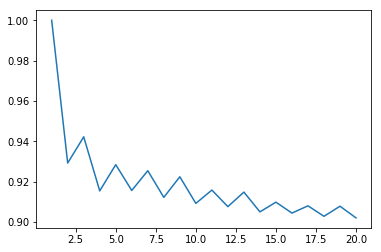

In [9]:
from __future__ import print_function
import os
import pandas as pd
import warnings
from sklearn.neighbors import KNeighborsClassifier


def accuracy(real, predict):
    return (sum(real == predict) /(real.shape[0]))


# Import the data using the file path
filepath = 'E:\Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(filepath)

data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

# Mute the sklearn warning

warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

d = {}
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    y_pred = knn.predict(X_data)
    d[k] = (accuracy(y_data, y_pred))

import matplotlib.pyplot as plt
plt.plot(d.keys(),d.values())